**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
twoC_df = pd.read_csv("2Classdata.csv")
twoC_df.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
297,45.575482,18.759135,33.774143,26.816347,116.797007,3.131910,Normal
30,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,Abnormal
152,63.404481,14.115327,48.136806,49.289153,111.916007,31.784495,Abnormal
198,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,Abnormal
35,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,Abnormal
279,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862,Normal
109,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,Abnormal
48,40.557357,17.977784,34.000000,22.579573,121.046246,-1.537383,Abnormal
151,48.030624,3.969815,58.344519,44.060809,125.350962,35.000078,Abnormal
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
twoC_df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [4]:
twoC_df.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
twoC_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
twoC_df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
twoC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [8]:
twoC_df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


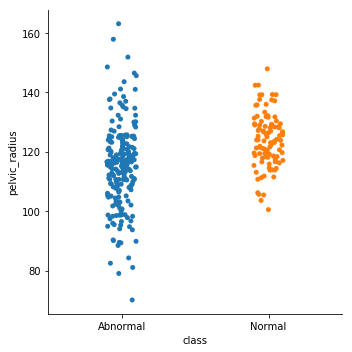

In [9]:
sns.catplot(x="class", y="pelvic_radius", data=twoC_df);

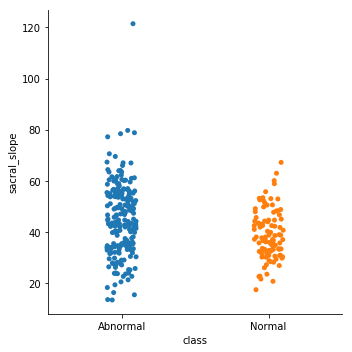

In [10]:
sns.catplot(x="class", y="sacral_slope", data=twoC_df);

# Encode the Class variable to integer.

In [11]:
le = preprocessing.LabelEncoder()
le.fit(twoC_df['class'])
list(le.classes_)

['Abnormal', 'Normal']

In [12]:
twoC_df['class']=le.transform(twoC_df['class'])

In [13]:
twoC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [14]:
Xf = twoC_df.iloc[:, :-1].values
Xf.shape

(310, 6)

In [15]:
twoC_labels = twoC_df["class"]

In [16]:
# store the bc_labels data into a separate np array

y = np.array(twoC_labels)
y.shape

(310,)

# Normalize your Data (X) to get values between 0 to 1.

In [17]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

twoC_df_z = twoC_df.apply(zscore)  # convert all attributes to Z scale 

twoC_df_z.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17,-3.581365e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01,-6.900656e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01,-6.900656e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01,-6.900656e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01,1.449138e+00
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01,1.449138e+00


In [18]:
# store the normalized features data into np array 

X = twoC_df_z.iloc[:, :-1].values
X.shape

(310, 6)

# Split the dat as train and test with a ratio of 70:30.

In [19]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [20]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

In [21]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [22]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7741935483870968

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [23]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    AS = knn.score(X_test, y_test)
    error.append(np.mean(pred_i != y_test))
    #error.append(1-AS)

Text(0,0.5,'Mean Error')

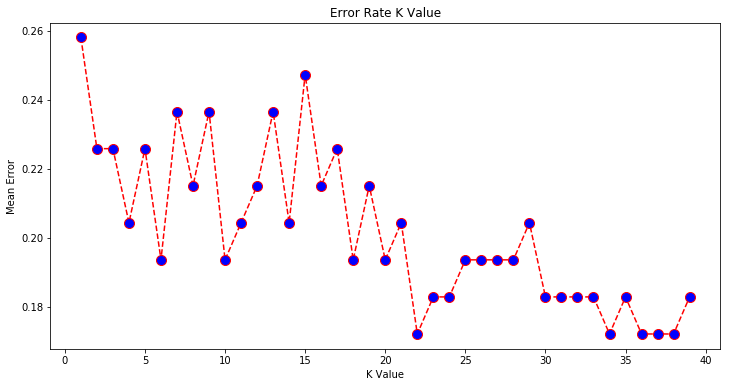

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [25]:
#From the output we can see that the mean error is lowest when the value of the K is between 36 and 38.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [26]:
threeC_df = pd.read_csv("3Classdata.csv")
threeC_df.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
19,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,Hernia
133,81.754419,20.123466,70.560440,61.630954,119.425086,55.506889,Spondylolisthesis
128,90.513961,28.272501,69.813942,62.241459,100.892160,58.823648,Spondylolisthesis
221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal
134,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,Spondylolisthesis
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Spondylolisthesis
164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,Spondylolisthesis
288,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,Normal
77,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Spondylolisthesis
160,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,Spondylolisthesis


In [27]:
threeC_df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [28]:
threeC_df.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [29]:
threeC_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [30]:
threeC_df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [31]:
threeC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [32]:
threeC_df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


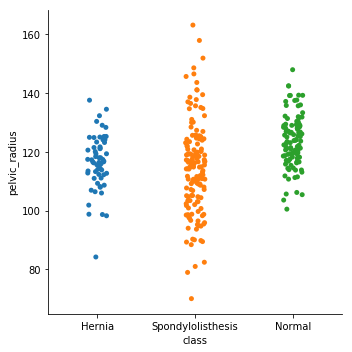

In [33]:
sns.catplot(x="class", y="pelvic_radius", data=threeC_df);

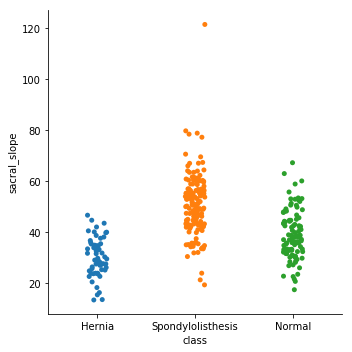

In [34]:
sns.catplot(x="class", y="sacral_slope", data=threeC_df);

In [35]:
le = preprocessing.LabelEncoder()
le.fit(threeC_df['class'])
list(le.classes_)

['Hernia', 'Normal', 'Spondylolisthesis']

In [36]:
threeC_df['class']=le.transform(threeC_df['class'])

In [37]:
threeC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


In [38]:
Xf3 = threeC_df.iloc[:, :-1].values
Xf3.shape

(310, 6)

In [39]:
threeC_labels = threeC_df["class"]

In [40]:
# store the bc_labels data into a separate np array

y3 = np.array(threeC_labels)
y3.shape

(310,)

In [41]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

threeC_df_z = threeC_df.apply(zscore)  # convert all attributes to Z scale 

threeC_df_z.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17,3.781921e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01,-1.675416e+00
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01,-3.769685e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01,-3.769685e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01,9.214786e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01,9.214786e-01


In [42]:
# store the normalized features data into np array 

X3 = threeC_df_z.iloc[:, :-1].values
X3.shape

(310, 6)

In [43]:
# Split X and y into training and test set in 70:30 ratio

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=1)

In [44]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

In [45]:
NNH.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [46]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X3_test)
NNH.score(X3_test, y3_test)

0.7419354838709677

In [47]:
error3 = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X3_train, y3_train)
    pred_i = knn.predict(X3_test)
    AS = knn.score(X3_test, y3_test)
    error3.append(np.mean(pred_i != y3_test))
    #error.append(1-AS)

Text(0,0.5,'Mean Error')

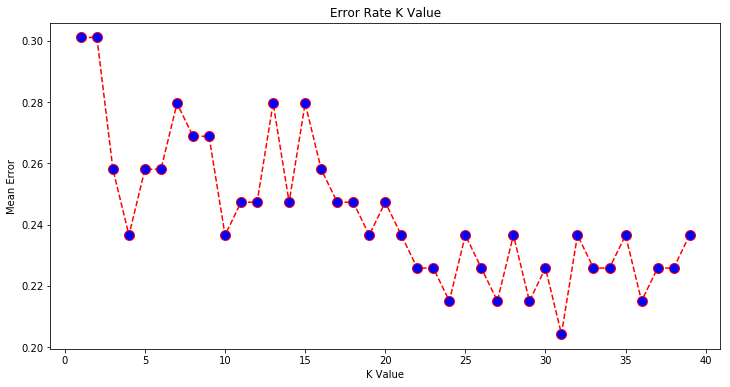

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error3, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [49]:
#From the output we can see that the mean error is lowest when the value of the K is b31.